In [1]:
# Pagrindinės bibliotekos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Vizualizacijai, atkreipkite dėmesį, kad naudojame "matplotlib" pagrindu
import warnings
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import time
import sqlite3

# Duomenų modeliavimas ir analizė
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Darbas su interneto naršyklėmis per Selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# Įspėjimų ignoravimas
warnings.filterwarnings('ignore')

# Specializuoti moduliai
from numpy.polynomial import Polynomial

import json
from sklearn.preprocessing import StandardScaler
from datetime import timedelta

<Axes: xlabel='x', ylabel='y'>

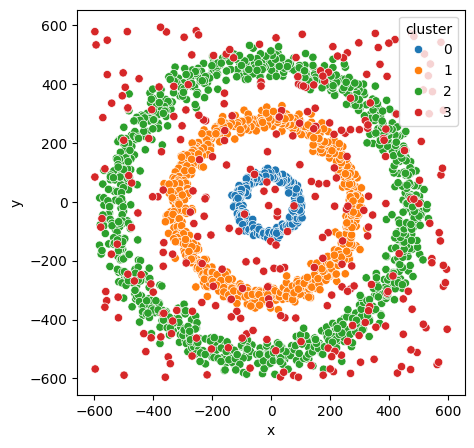

In [ ]:
# DB - scan klasifikavimas 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import math
def make_circle(r, n, noise = 30, seed = 1234):
    np.random.seed(seed)
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-noise,noise), math.sin(2*math.pi/n*x)*r+np.random.normal(-noise,noise)) for x in range(1,n+1)]

small_circle = make_circle(100, 300, 10)
medium_circle = make_circle(300, 700, 20)
big_circle = make_circle(500, 1000, 30)

noise = [(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)]
def arrray_to_df(arr, i):
    df = pd.DataFrame(arr)
    df['cluster'] = str(i)
    return df

df = [arrray_to_df(arr, i) for i, arr in enumerate([small_circle, medium_circle, big_circle, noise])]

df = pd.concat(df)
df.columns = ['x', 'y', 'cluster']


plt.rcParams['figure.figsize'] = [5,5]
sns.scatterplot(
data = df, 
x = 'x',
y = 'y',
hue = 'cluster'
)

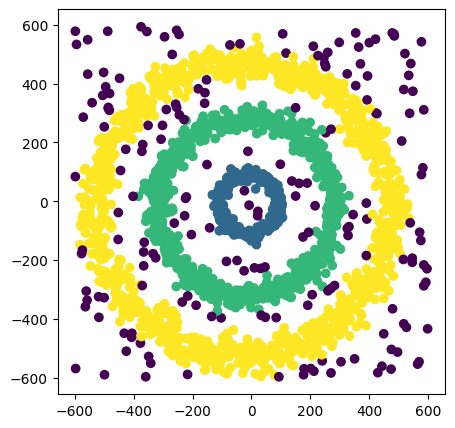

In [ ]:
df['dbscan'] = DBSCAN(eps=32, min_samples=5).fit_predict(df[['x', 'y']])

plt.scatter(
    df['x'],
    df['y'],
    c=df['dbscan']
)


In [33]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('aruodas3.db')
df = pd.read_sql_query("SELECT * FROM aruododuomenys", conn)
df = df[df['miestas'] == 'Vilnius']

df['plotas'] = df['plotas'].str.replace(' m²', '').str.replace(',', '.').astype(float)
df['kvadratas'] = df['plotas'].astype(float)
df['kvadrato_kaina'] = df['kaina'] / df['kvadratas']
df = df[['ilguma', 'platuma', 'kvadrato_kaina']]
df = df.dropna(subset=['ilguma', 'platuma', 'kvadrato_kaina'])
df


,ilguma,platuma,kvadrato_kaina
0,54.701257,25.272667,4967.077011
1,54.705467,25.286944,3076.230492
2,54.717923,25.238122,2571.385857
3,54.691637,25.284638,6275.510204
4,54.707286,25.286241,3190.568895
...,...,...,...
3084,54.682515,25.220766,1923.076923
3085,54.710757,25.287010,2528.141724
3086,54.700492,25.307491,2500.000000
3087,54.714199,25.313860,2099.941894


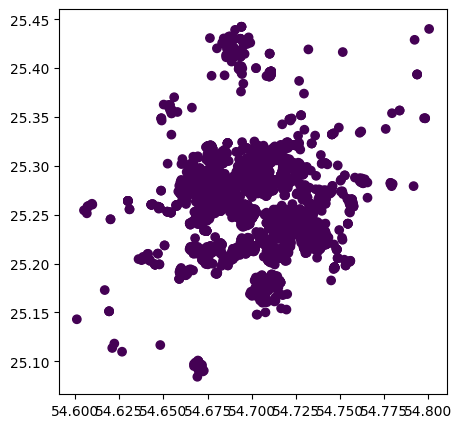

In [36]:
df = df[['ilguma', 'platuma']]
df['dbscan'] = DBSCAN(eps=0.00001, min_samples=1000).fit_predict(df[['ilguma','platuma']])

plt.scatter(
    df['ilguma'],
    df['platuma'],
    c=df['dbscan']
)

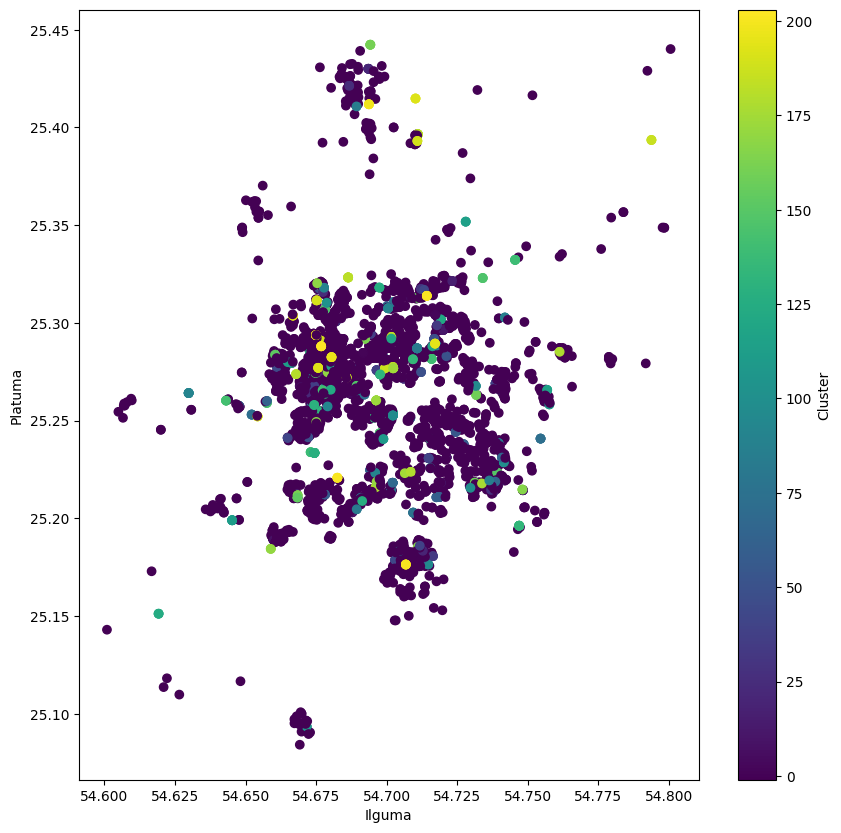

In [54]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df['dbscan'] = DBSCAN(eps=0.0000000001, min_samples=3).fit_predict(df_scaled)

plt.figure(figsize=(10, 10))  # Pakeičia grafiko dydį (plotis=10, aukštis=6)

plt.scatter(
    df['ilguma'],
    df['platuma'],
    c=df['dbscan'],
    cmap='viridis'
)
plt.xlabel('Ilguma')
plt.ylabel('Platuma')
plt.colorbar(label='Cluster')
plt.show()


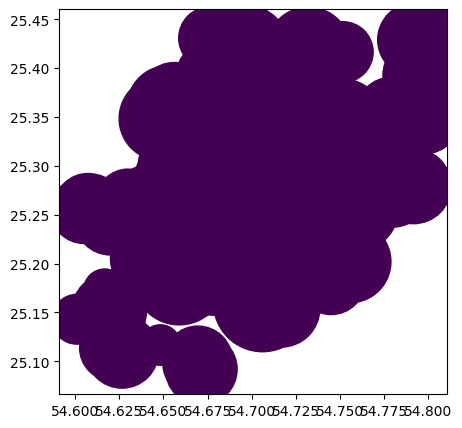

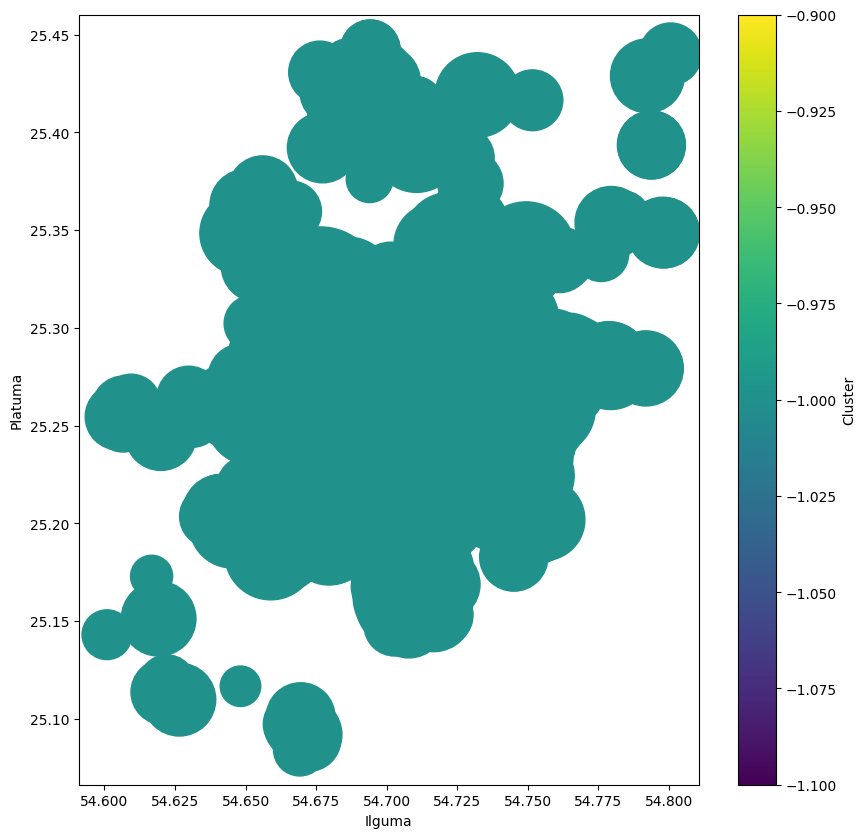

In [60]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('aruodas3.db')
df = pd.read_sql_query("SELECT * FROM aruododuomenys", conn)
df = df[df['miestas'] == 'Vilnius']

df['plotas'] = df['plotas'].str.replace(' m²', '').str.replace(',', '.').astype(float)
df['kvadratas'] = df['plotas'].astype(float)
df['kvadrato_kaina'] = df['kaina'] / df['kvadratas']
df = df[['ilguma', 'platuma', 'kvadrato_kaina']]
df = df.dropna(subset=['ilguma', 'platuma', 'kvadrato_kaina'])
df


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df['dbscan'] = DBSCAN(eps=0.00001, min_samples=1000).fit_predict(df[['ilguma','platuma', 'kvadrato_kaina']])

plt.scatter(
    df['ilguma'],
    df['platuma'],
    df['kvadrato_kaina'],
    c=df['dbscan']
)

plt.figure(figsize=(10, 10))  # Pakeičia grafiko dydį (plotis=10, aukštis=6)

plt.scatter(
    df['ilguma'],
    df['platuma'],
    df['kvadrato_kaina'],
    c=df['dbscan'],
    cmap='viridis'
)
plt.xlabel('Ilguma')
plt.ylabel('Platuma')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Suskirstykite eismo įvykius į klasterius (2022 metų) (pagal koordinantes, atskirai kiekvienai eismo įvykio rūšiai, su 
# DBSCAN bei KMeans). Darydami KMeans klasterizaciją, pasinaudokite elbow grafiku optimaliam klasterių skaičiaus nustatymu
# (Jei pavyksta)
# Patekite vizualizacijas klasterių išsidėstymo su mapbox()
# Pasirinkite vieną eismo įvykių rūšį, ir su GridsearchCV, GridSearch klase suraskite optimalų klasterių kiekį
# Tada taip pat pateikite klasterių vizualizacijas.